## Libraries

In [21]:
import cv2
import os
import numpy as np
import readthermal as rd
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

##  Reading a Video file and getting Frames (Images) and writing them to System

In [2]:
# path='../data/'
# input_file_name='ft'
# cap=cv2.VideoCapture(path+input_file_name+".mp4")
# count=0

In [3]:
# shape=(0,0,0)
# shape_set=False
# while(cap.isOpened()):
#     ret,frame=cap.read()
#     if(not shape_set):
#         shape=frame.shape
#         shape_set=True
#     if(ret==True):
#         cv2.imwrite(input_file_name+"frame_"+str(count)+".jpg",frame)
#         count=count+1
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()
# print(shape)

## Reading Thermal Images stored on the System and Storing them in a numpy Array

In [4]:
# np_img=[]

# for i in range(0,640):
#     np_img.append([])
#     for j in range(0,480):
#         np_img[i].append([])

# np.zeros((640,480,count))

# for i in range(0,count):
#     img=cv2.imread("frame_"+str(i)+".jpg")
#     for j in range(0,640):
#         for k in range(0,480):
#             np_img[j][k].append(img[j][k])

# np_img=np.array(np_img, dtype=complex)

In [6]:
shape=(640,480)

np_img=np.zeros((shape[0],shape[1],12), dtype=complex)

for i in range(0,12):
    img=rd.extract_thermal("flir_20181120T2132"+str(i+24)+".jpg")
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            np_img[j][k][i]=img[j][k]

## Printing Dimension of numpy Array

In [7]:
print(np_img.shape)
# print(np_img)

(640, 480, 12)


## Calculation of Phase to multipled to Fourier Coefficients of times series value of same pixel in Thermogram (Thermal Image)

In [8]:
z=0.002
k=0.33
c=3780
p=1057
X=k/(c*p)
f=0.01

phase=np.exp(z*np.sqrt(np.pi*f/X)*(1+1j))

## Printing Phase

In [9]:
print(phase)

(1.1362276288627418+3.2396754954446267j)


## Calculation of Blood Flow from pixel values of series of Thermograms

In [10]:
for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.fft.fft(np_img[i][j])*phase

for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.real(np.fft.ifft(np_img[i][j]))

## Printing Blood Flow Values

In [11]:
print(np_img.shape)
np_img=np.real(np_img)

(640, 480, 12)


## Seperation Blood Flow values and Creating Images and Writing to System

In [12]:

scaler = MinMaxScaler(feature_range=(0, 1))

normalized_data=np.zeros((shape[0],shape[1],12), dtype=float)

for j in range(0,shape[0]):
    for k in range(0,shape[1]):
        l=np_img[j][k]
        l=l.reshape(len(l), 1)
        scaler = scaler.fit(l)
        l=scaler.transform(l)
        l=l.reshape(1,len(l))
        normalized_data[j][k]=l


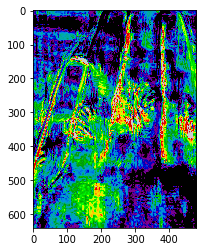

In [25]:
cmap = get_cmap('nipy_spectral')

frame_array=[]

for i in range(0,12):
    img=np.zeros((shape[0],shape[1]))
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            img[j][k]=normalized_data[j][k][i]
    im = plt.imshow(img,cmap=cmap) 
    plt.savefig("out"+str(i)+".jpg")
    frame_array.append(img)

## Generating Blood Flow Video from Blood Flow Images

In [ ]:
fps=3
out=cv2.VideoWriter("b_"+input_file_name+".avi",cv2.VideoWriter_fourcc(*'XVID'),fps,(shape[1],shape[0]))

for i in range(len(frame_array)):
    out.write(frame_array[i])

out.release()

## Printing length of Frame Array

In [ ]:
print(len(frame_array))